# Amazon Sales Data - Exploratory Data Analysis

**Dataset Description:**
This dataset contains information on 1K+ Amazon products, including their ratings, reviews, and other details.

**Objective:** Perform comprehensive EDA to extract insights about product performance, pricing, and customer behavior.

## 1. Setup and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import re
from collections import Counter

# Configure visualization settings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
# Load the dataset
# Dataset source: https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset

df = pd.read_csv(r'D:\\MachineLearning\\Exploratory_data_analysis\\data\\amazon.csv')

print(f"Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")

Shape: (1465, 16)

Columns: ['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']


In [5]:
# first 10 rows
df.head(10)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...
5,B08Y1TFSP6,pTron Solero TB301 3A Type-C Data and Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹149,"₹1,000",85%,3.9,"24,871",Fast Charging & Data Sync: Solero TB301 Type-C...,"AEQ2YMXSZWEOHK2EHTNLOS56YTZQ,AGRVINWECNY7323CW...","Jayesh,Rajesh k.,Soopy,amazon customer,Aman,Sh...","R7S8ANNSDPR40,R3CLZFLHVJU26P,RFF7U7MPQFUGR,R1M...","It's pretty good,Average quality,very good and...","It's a good product.,Like,Very good item stron...",https://m.media-amazon.com/images/I/31wOPjcSxl...,https://www.amazon.in/Solero-TB301-Charging-48...
6,B08WRWPM22,"boAt Micro USB 55 Tangle-free, Sturdy Micro US...",Computers&Accessories|Accessories&Peripherals|...,₹176.63,₹499,65%,4.1,"15,188",It Ensures High Speed Transmission And Chargin...,"AG7C6DAADCTRQJG2BRS3RIKDT52Q,AFU7BOMPVJ7Q3TTA4...","Vivek kumar,Amazon Customer,SARTHAK,Chiranjeev...","R8E73K2KWJRDS,RSD0JTIIWQQL8,R64CRSTE9SLW1,R2FR...","Long durable.,good,Does not charge Lenovo m8 t...",Build quality is good and it is comes with 2 y...,https://m.media-amazon.com/images/W/WEBP_4

In [6]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [7]:
# Statistical summary
df.describe(include='all')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
count,1465,1465,1465,1465,1465,1465,1465,1463,1465,1465,1465,1465,1465,1465,1465,1465
unique,1351,1337,211,550,449,92,28,1143,1293,1194,1194,1194,1194,1212,1412,1465
top,B08WRWPM22,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,50%,4.1,"9,378",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...","$@|\|TO$|-|,Sethu madhav,Akash Thakur,Burger P...","R3F4T5TRYPTMIG,R3DQIEC603E7AY,R1O4Z15FD40PV5,R...","Worked on iPhone 7 and didn’t work on XR,Good ...","I am not big on camera usage, personally. I wa...",https://m.media-amazon.com/images/I/413sCRKobN...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
freq,3,5,233,53,120,56,244,9,6,10,10,10,10,8,3,1


## 2. Data Cleaning and Preprocessing

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_values,
    'Percentage': missing_percentage
}).sort_values('Missing_Count', ascending=False)

print("Missing Values Summary:")
print(missing_df[missing_df['Missing_Count'] > 0])

Missing Values Summary:
              Missing_Count  Percentage
rating_count              2        0.14


In [9]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    print(f"Removing {duplicates} duplicate rows...")
    df = df.drop_duplicates()
    print(f"New shape: {df.shape}")

Number of duplicate rows: 0


In [10]:
# Clean price columns (remove currency symbols and convert to numeric)
def clean_price(price_str):
    """Remove currency symbols and convert to float"""
    if pd.isna(price_str):
        return np.nan
    # Remove currency symbols, commas, and convert to float
    cleaned = re.sub(r'[₹$,]', '', str(price_str))
    try:
        return float(cleaned)
    except:
        return np.nan

# Apply cleaning to price columns
if 'discounted_price' in df.columns:
    df['discounted_price'] = df['discounted_price'].apply(clean_price)
if 'actual_price' in df.columns:
    df['actual_price'] = df['actual_price'].apply(clean_price)

print("Price columns cleaned successfully!")

Price columns cleaned successfully!


In [11]:
# Clean discount_percentage column
if 'discount_percentage' in df.columns:
    df['discount_percentage'] = df['discount_percentage'].astype(str).str.replace('%', '').astype(float)

print("Discount percentage cleaned!")

Discount percentage cleaned!


In [12]:
# Handle missing values in critical columns
# Drop rows with missing critical information
critical_cols = ['product_id', 'product_name', 'category']
df = df.dropna(subset=[col for col in critical_cols if col in df.columns])

print(f"Shape after handling missing critical values: {df.shape}")

Shape after handling missing critical values: (1465, 16)


## 3. Question 1: Average Rating for Each Product Category

In [15]:
df.head(5)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.00,1099.00,64.00,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.00,349.00,43.00,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.00,1899.00,90.00,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.00,699.00,53.00,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.00,399.00,61.00,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [18]:
df['rating'].dtype

dtype('O')

In [19]:
df['rating_count'].dtype

dtype('O')

In [ ]:
if 'rating' in df.columns:
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    print(f"Rating column converted to numeric. Data type: {df['rating'].dtype}")

if 'rating_count' in df.columns:
    # Remove any commas from rating_count (e.g., '1,234' -> '1234')
    df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '')
    df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')
    print(f"Rating count column converted to numeric. Data type: {df['rating_count'].dtype}")

print("\Numeric columns converted successfully!")

Rating column converted to numeric. Data type: float64
Rating count column converted to numeric. Data type: float64

✓ Numeric columns converted successfully!



=== Average Rating by Category ===
category
Computers&Accessories|Tablets                                                                                   4.60
Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters                                        4.50
Electronics|Cameras&Photography|Accessories|Film                                                                4.50
Computers&Accessories|Components|Memory                                                                         4.50
Electronics|HomeAudio|MediaStreamingDevices|StreamingClients                                                    4.50
                                                                                                                ... 
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                              3.60
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                          3.50
Computers&Accessori

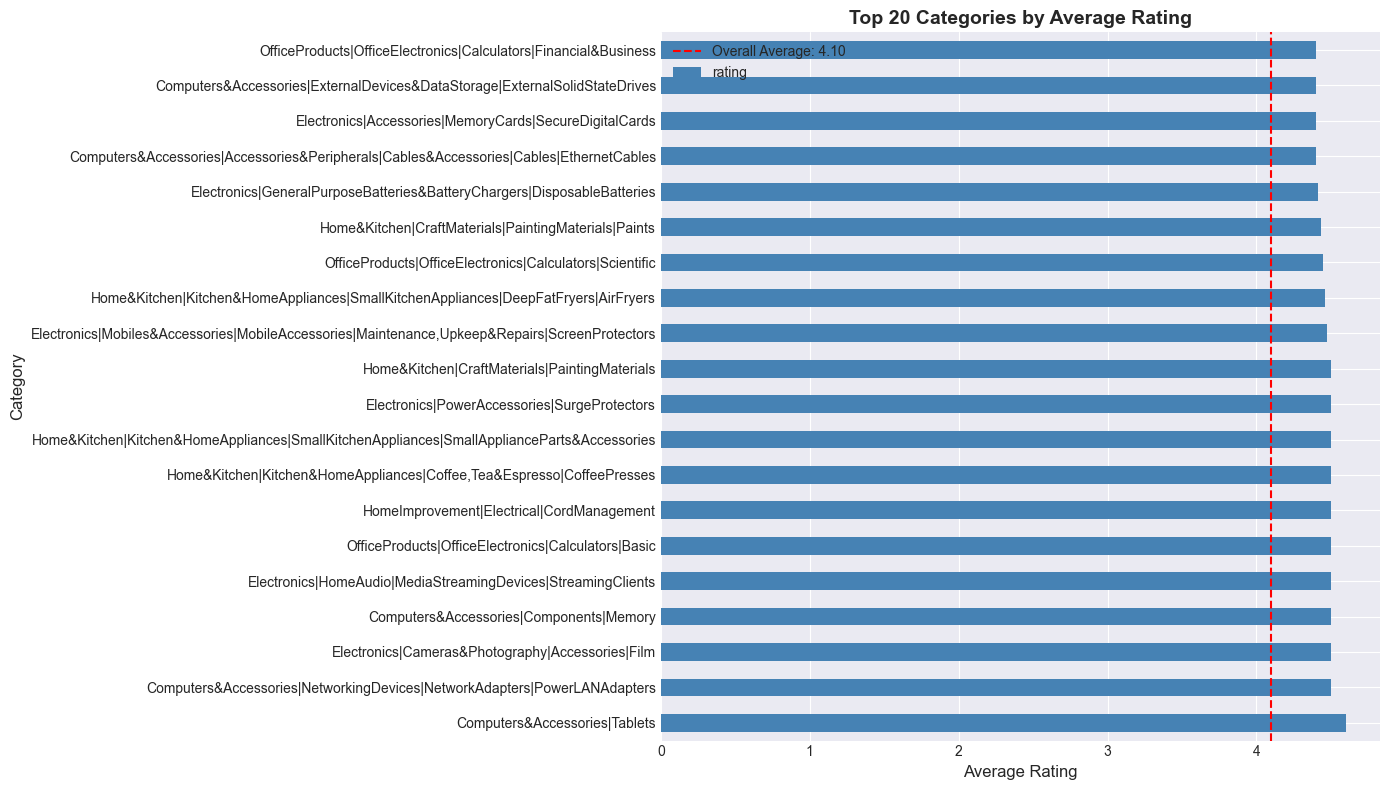


Highest rated category: Computers&Accessories|Tablets (4.60)
Lowest rated category: Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeeGrinders|ElectricGrinders (3.30)
Overall average rating: 4.10


In [21]:
# Calculate average rating by category
avg_rating_by_category = df.groupby('category')['rating'].mean().sort_values(ascending=False)

print("\n=== Average Rating by Category ===")
print(avg_rating_by_category)

# Visualize
plt.figure(figsize=(14, 8))
avg_rating_by_category.head(20).plot(kind='barh', color='steelblue')
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Top 20 Categories by Average Rating', fontsize=14, fontweight='bold')
plt.axvline(x=df['rating'].mean(), color='red', linestyle='--', label=f'Overall Average: {df["rating"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

# Summary statistics
print(f"\nHighest rated category: {avg_rating_by_category.idxmax()} ({avg_rating_by_category.max():.2f})")
print(f"Lowest rated category: {avg_rating_by_category.idxmin()} ({avg_rating_by_category.min():.2f})")
print(f"Overall average rating: {df['rating'].mean():.2f}")

## 4. Question 2: Top Rating Count Products by Category


=== Top Rating Count Products by Category ===
                                               category  \
12    Electronics|HomeTheater,TV&Video|Accessories|C...   
352   Electronics|Headphones,Earbuds&Accessories|Hea...   
370   Electronics|Mobiles&Accessories|Smartphones&Ba...   
1028  Home&Kitchen|Kitchen&Dining|KitchenTools|Manua...   
588   Computers&Accessories|ExternalDevices&DataStor...   
864         Electronics|Accessories|MemoryCards|MicroSD   
143   Computers&Accessories|NetworkingDevices|Networ...   
337   Electronics|Mobiles&Accessories|MobileAccessor...   
191   Computers&Accessories|Accessories&Peripherals|...   
701   Computers&Accessories|NetworkingDevices|Repeat...   
345   Electronics|Mobiles&Accessories|Smartphones&Ba...   
1022  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
736     Computers&Accessories|NetworkingDevices|Routers   
599   Electronics|Headphones,Earbuds&Accessories|Hea...   
691   Computers&Accessories|NetworkingDevices|Networ...   
719   Ele

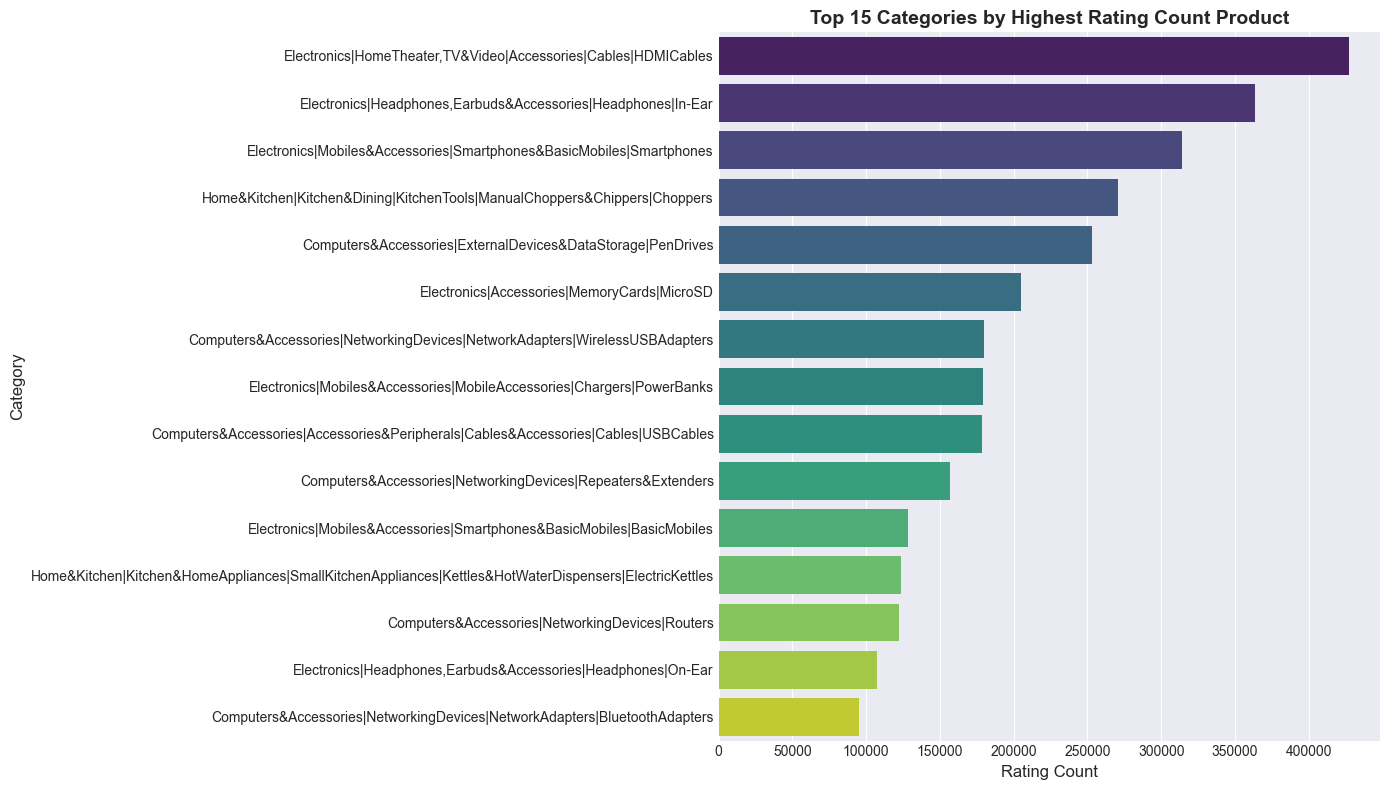

In [22]:
# Find products with highest rating count in each category
top_rating_count_by_category = df.loc[df.groupby('category')['rating_count'].idxmax()]
top_products = top_rating_count_by_category[['category', 'product_name', 'rating_count', 'rating']].sort_values('rating_count', ascending=False)

print("\n=== Top Rating Count Products by Category ===")
print(top_products.head(20))

# Visualize top 15 categories
plt.figure(figsize=(14, 8))
top_15 = top_products.head(15)
sns.barplot(data=top_15, y='category', x='rating_count', palette='viridis')
plt.xlabel('Rating Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.title('Top 15 Categories by Highest Rating Count Product', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Question 3: Distribution of Discounted Prices vs Actual Prices

In [23]:
# Price distribution analysis
print("\n=== Price Distribution Statistics ===")
print("\nDiscounted Price:")
print(df['discounted_price'].describe())
print("\nActual Price:")
print(df['actual_price'].describe())

# Calculate savings
df['savings'] = df['actual_price'] - df['discounted_price']
print(f"\nAverage savings per product: ₹{df['savings'].mean():.2f}")


=== Price Distribution Statistics ===

Discounted Price:
count    1465.00
mean     3125.31
std      6944.30
min        39.00
25%       325.00
50%       799.00
75%      1999.00
max     77990.00
Name: discounted_price, dtype: float64

Actual Price:
count     1465.00
mean      5444.99
std      10874.83
min         39.00
25%        800.00
50%       1650.00
75%       4295.00
max     139900.00
Name: actual_price, dtype: float64

Average savings per product: ₹2319.68


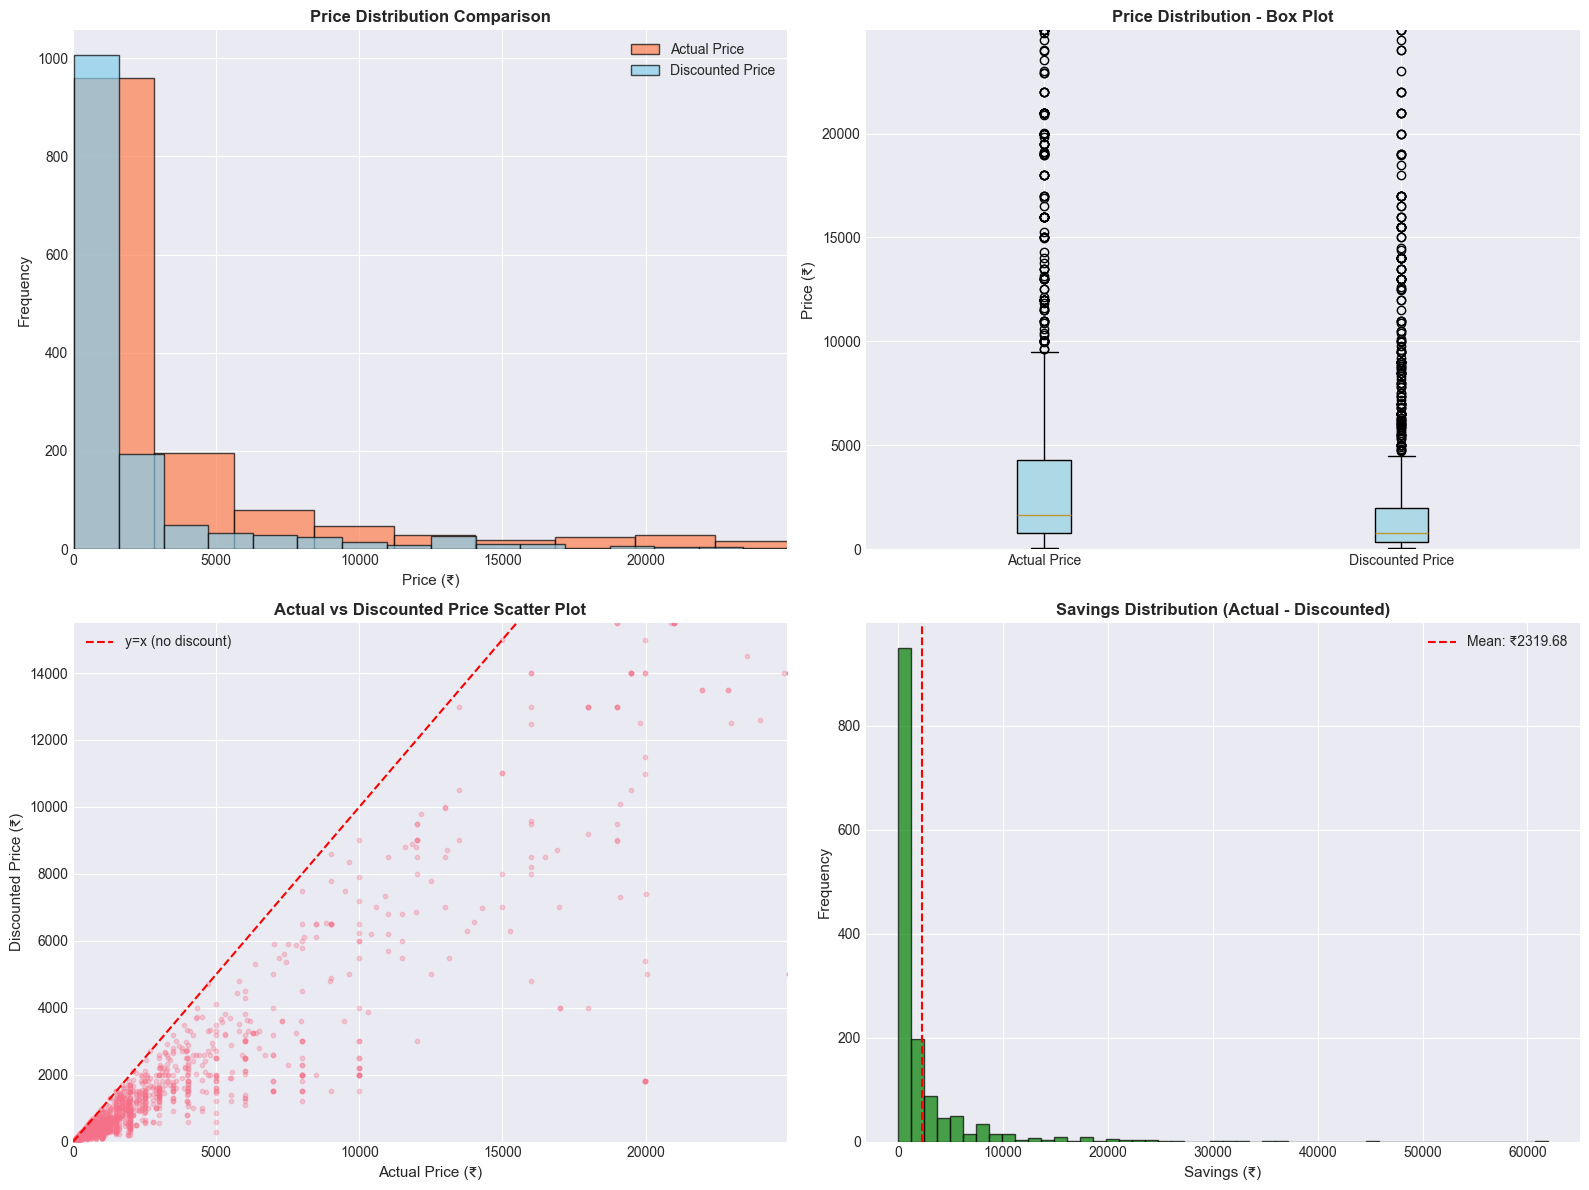

In [24]:
# Visualize price distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram comparison
axes[0, 0].hist(df['actual_price'].dropna(), bins=50, alpha=0.7, label='Actual Price', color='coral', edgecolor='black')
axes[0, 0].hist(df['discounted_price'].dropna(), bins=50, alpha=0.7, label='Discounted Price', color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Price (₹)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Price Distribution Comparison', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].set_xlim(0, df['actual_price'].quantile(0.95))

# Box plot comparison
price_data = pd.DataFrame({
    'Actual Price': df['actual_price'],
    'Discounted Price': df['discounted_price']
})
axes[0, 1].boxplot([df['actual_price'].dropna(), df['discounted_price'].dropna()],
                    labels=['Actual Price', 'Discounted Price'],
                    patch_artist=True,
                    boxprops=dict(facecolor='lightblue'))
axes[0, 1].set_ylabel('Price (₹)', fontsize=11)
axes[0, 1].set_title('Price Distribution - Box Plot', fontsize=12, fontweight='bold')
axes[0, 1].set_ylim(0, df['actual_price'].quantile(0.95))

# Scatter plot
axes[1, 0].scatter(df['actual_price'], df['discounted_price'], alpha=0.3, s=10)
axes[1, 0].plot([0, df['actual_price'].max()], [0, df['actual_price'].max()], 'r--', label='y=x (no discount)')
axes[1, 0].set_xlabel('Actual Price (₹)', fontsize=11)
axes[1, 0].set_ylabel('Discounted Price (₹)', fontsize=11)
axes[1, 0].set_title('Actual vs Discounted Price Scatter Plot', fontsize=12, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].set_xlim(0, df['actual_price'].quantile(0.95))
axes[1, 0].set_ylim(0, df['discounted_price'].quantile(0.95))

# Savings distribution
axes[1, 1].hist(df['savings'].dropna(), bins=50, color='green', alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Savings (₹)', fontsize=11)
axes[1, 1].set_ylabel('Frequency', fontsize=11)
axes[1, 1].set_title('Savings Distribution (Actual - Discounted)', fontsize=12, fontweight='bold')
axes[1, 1].axvline(df['savings'].mean(), color='red', linestyle='--', label=f'Mean: ₹{df["savings"].mean():.2f}')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## 6. Question 4: Average Discount Percentage Across Categories


=== Average Discount Percentage by Category ===
category
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors                      90.00
Electronics|Headphones,Earbuds&Accessories|Earpads                                                              90.00
Electronics|Mobiles&Accessories|MobileAccessories|Décor|PhoneCharms                                             90.00
Electronics|Headphones,Earbuds&Accessories|Adapters                                                             88.00
Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Keyboard&MiceAccessories|DustCovers   87.50
Electronics|Mobiles&Accessories|MobileAccessories|Mounts|Shower&WallMounts                                      82.00
Computers&Accessories|Components|InternalHardDrives                                                             80.00
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                         78.5

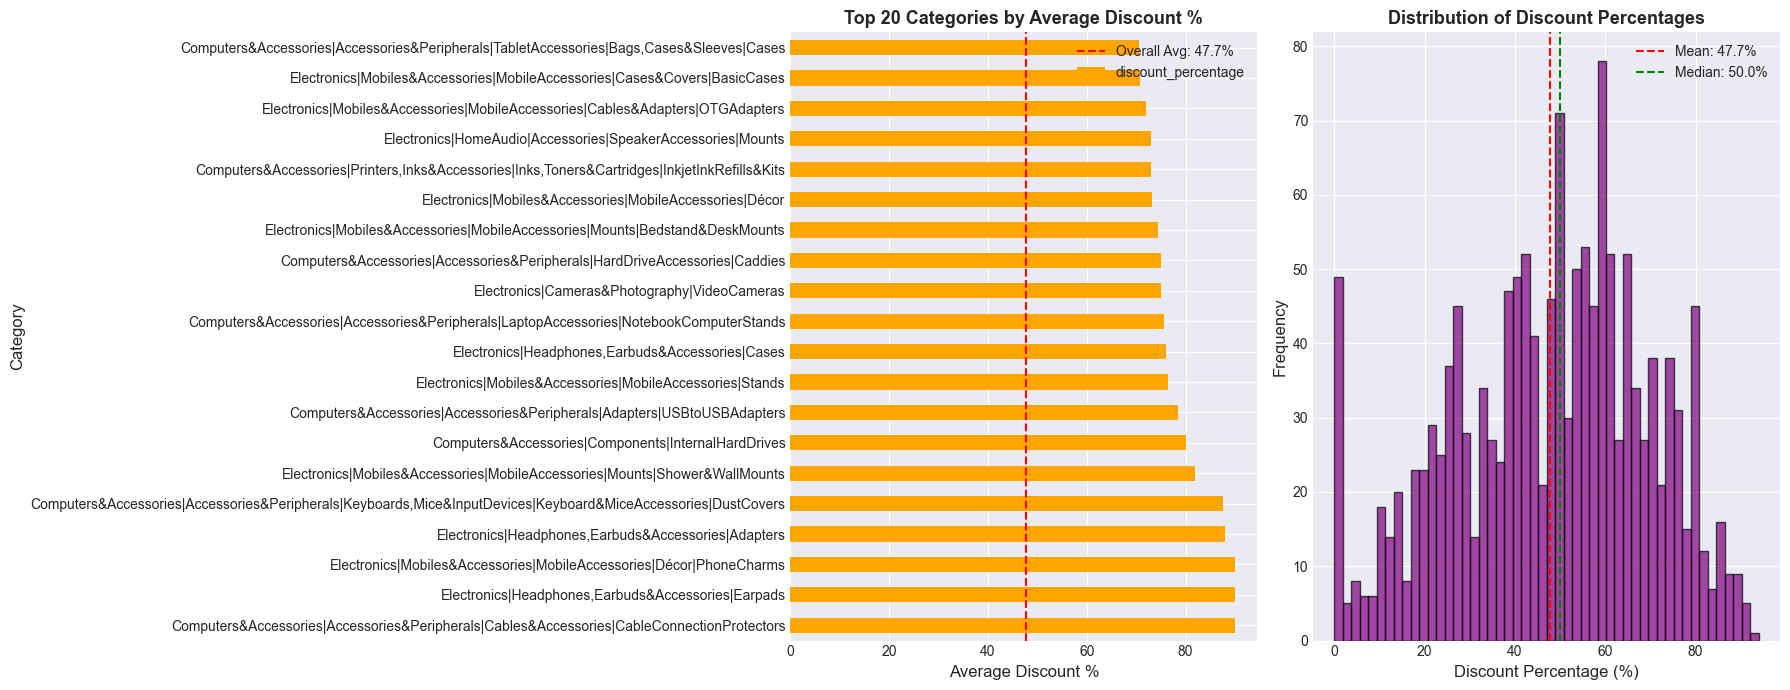


Highest discount category: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|CableConnectionProtectors (90.0%)
Lowest discount category: Electronics|Cameras&Photography|Accessories|Film (0.0%)


In [25]:
# Calculate average discount percentage by category
avg_discount_by_category = df.groupby('category')['discount_percentage'].mean().sort_values(ascending=False)

print("\n=== Average Discount Percentage by Category ===")
print(avg_discount_by_category.head(20))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Top 20 categories by discount
avg_discount_by_category.head(20).plot(kind='barh', ax=axes[0], color='orange')
axes[0].set_xlabel('Average Discount %', fontsize=12)
axes[0].set_ylabel('Category', fontsize=12)
axes[0].set_title('Top 20 Categories by Average Discount %', fontsize=13, fontweight='bold')
axes[0].axvline(x=df['discount_percentage'].mean(), color='red', linestyle='--', 
                label=f'Overall Avg: {df["discount_percentage"].mean():.1f}%')
axes[0].legend()

# Distribution of discount percentages
axes[1].hist(df['discount_percentage'].dropna(), bins=50, color='purple', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Discount Percentage (%)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Distribution of Discount Percentages', fontsize=13, fontweight='bold')
axes[1].axvline(df['discount_percentage'].mean(), color='red', linestyle='--', 
                label=f'Mean: {df["discount_percentage"].mean():.1f}%')
axes[1].axvline(df['discount_percentage'].median(), color='green', linestyle='--', 
                label=f'Median: {df["discount_percentage"].median():.1f}%')
axes[1].legend()

plt.tight_layout()
plt.show()

print(f"\nHighest discount category: {avg_discount_by_category.idxmax()} ({avg_discount_by_category.max():.1f}%)")
print(f"Lowest discount category: {avg_discount_by_category.idxmin()} ({avg_discount_by_category.min():.1f}%)")

## 7. Question 5: Most Popular Product Names


=== Top 20 Most Popular Products (by Rating Count) ===
                                           product_name  \
12    AmazonBasics Flexible Premium HDMI Cable (Blac...   
47    Amazon Basics High-Speed HDMI Cable, 6 Feet - ...   
65    Amazon Basics High-Speed HDMI Cable, 6 Feet (2...   
684   AmazonBasics Flexible Premium HDMI Cable (Blac...   
352   boAt Bassheads 100 in Ear Wired Earphones with...   
400   boAt Bassheads 100 in Ear Wired Earphones with...   
584   boAt BassHeads 100 in-Ear Wired Headphones wit...   
370   Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...   
371   Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...   
473   Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...   
566   Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...   
760   boAt Bassheads 225 in Ear Wired Earphones with...   
1028  Pigeon Polypropylene Mini Handy and Compact Ch...   
588           SanDisk Cruzer Blade 32GB USB Flash Drive   
864   SanDisk Extreme SD UHS I 64GB Card for 4K Vide...   


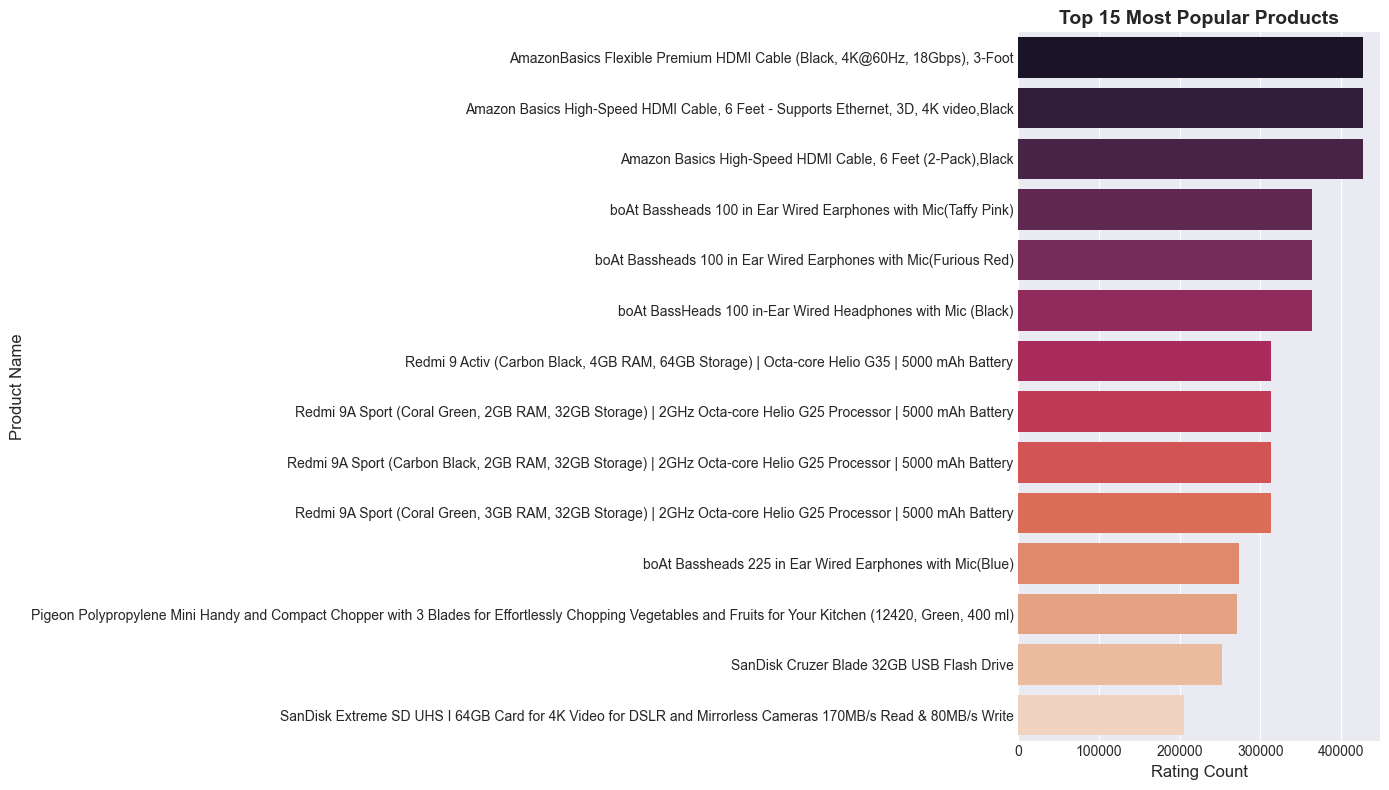

In [26]:
# Find most popular products based on rating_count
top_products_by_popularity = df.nlargest(20, 'rating_count')[['product_name', 'category', 'rating', 'rating_count', 'discounted_price']]

print("\n=== Top 20 Most Popular Products (by Rating Count) ===")
print(top_products_by_popularity)

# Visualize
plt.figure(figsize=(14, 8))
top_15_products = df.nlargest(15, 'rating_count')
sns.barplot(data=top_15_products, y='product_name', x='rating_count', palette='rocket')
plt.xlabel('Rating Count', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.title('Top 15 Most Popular Products', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 8. Question 6: Most Popular Product Keywords


=== Top 30 Most Popular Product Keywords ===
black: 468
cable: 401
usb: 389
charging: 246
fast: 211
smart: 172
white: 155
type: 148
compatible: 142
data: 135
wireless: 118
led: 118
water: 109
remote: 108
heater: 106
bluetooth: 105
pro: 99
electric: 94
braided: 92
battery: 92
ram: 91
type-c: 90
sync: 89
grey: 89
watch: 89
iphone: 83
adapter: 82
storage: 82
laptop: 81
inches: 80


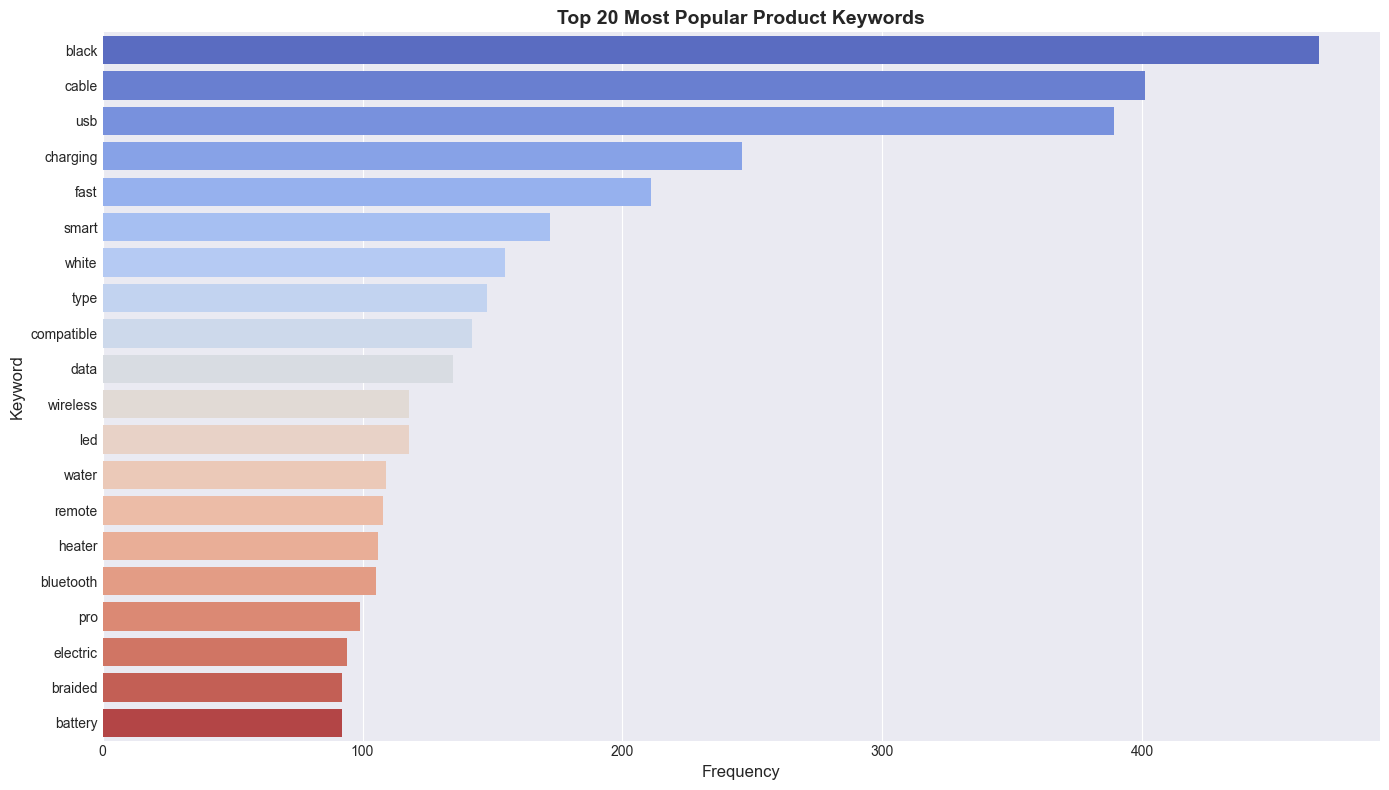

In [27]:
# Extract keywords from product names
def extract_keywords(text):
    """Extract meaningful keywords from product names"""
    if pd.isna(text):
        return []
    # Convert to lowercase and split
    words = str(text).lower().split()
    # Remove common words and symbols
    stop_words = {'the', 'a', 'an', 'and', 'or', 'for', 'with', 'of', 'in', 'on', 'at', 'to', 'from', '&', '-', '|'}
    keywords = [word.strip('()[]{},.!?;:"\'-') for word in words if word not in stop_words and len(word) > 2]
    return keywords

# Extract all keywords
all_keywords = []
for product_name in df['product_name'].dropna():
    all_keywords.extend(extract_keywords(product_name))

# Count keywords
keyword_counts = Counter(all_keywords)
top_keywords = keyword_counts.most_common(30)

print("\n=== Top 30 Most Popular Product Keywords ===")
for keyword, count in top_keywords:
    print(f"{keyword}: {count}")

# Visualize
keywords_df = pd.DataFrame(top_keywords[:20], columns=['Keyword', 'Count'])

plt.figure(figsize=(14, 8))
sns.barplot(data=keywords_df, y='Keyword', x='Count', palette='coolwarm')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Keyword', fontsize=12)
plt.title('Top 20 Most Popular Product Keywords', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 9. Question 7: Most Popular Product Reviews


=== Products with Most Reviews ===
product_name
Fire-Boltt Ninja Call Pro Plus 1.83" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution                                            5
Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating                                                     4
Samsung Galaxy M13 5G (Aqua Green, 6GB, 128GB Storage) | 5000mAh Battery | Upto 12GB RAM with RAM Plus                                                                                               3
Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices                                                             3
boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black)                                                                                         

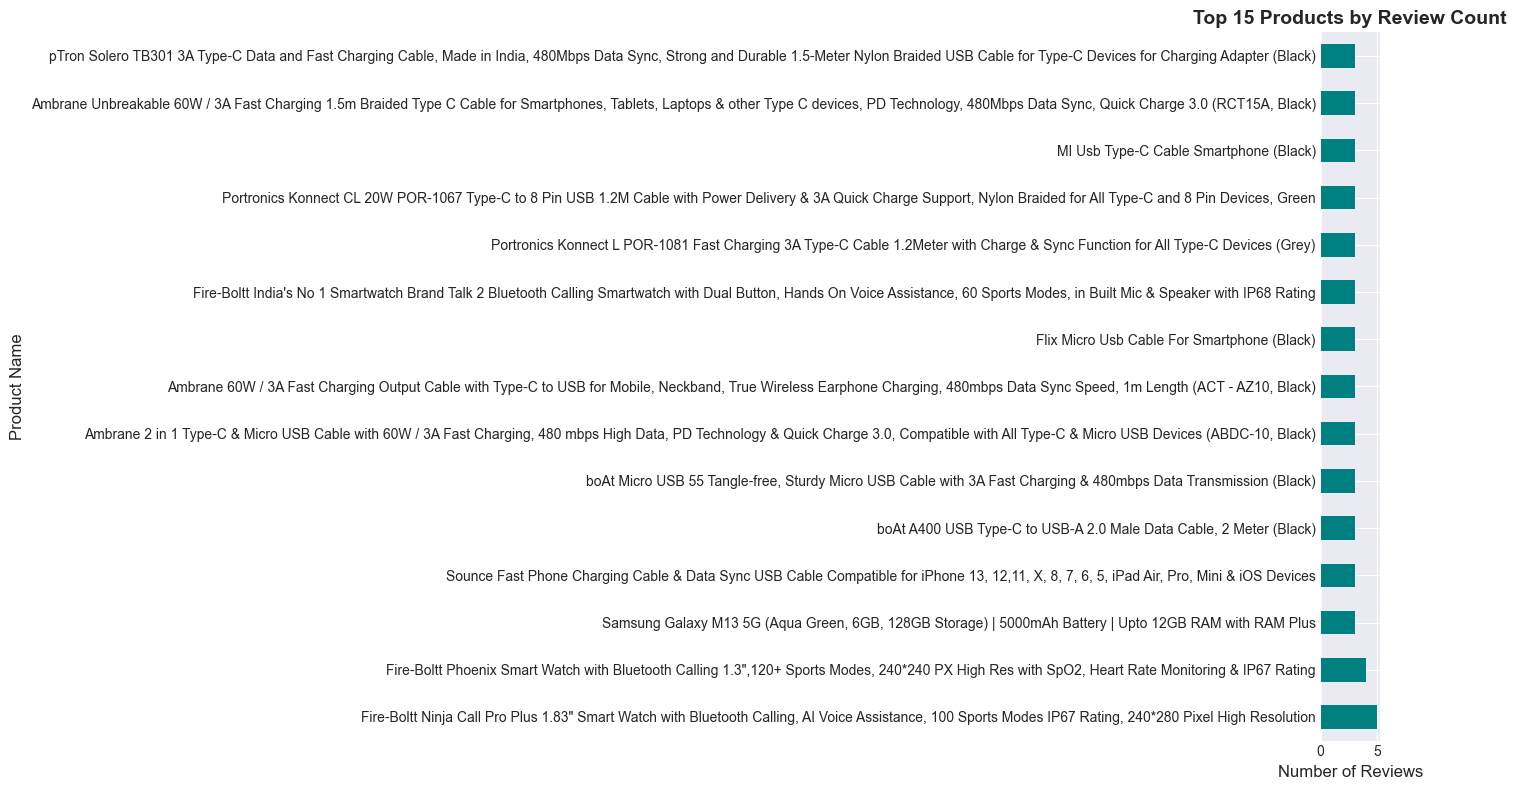

In [28]:
# Analyze reviews - find products with most reviews
products_with_most_reviews = df.groupby('product_name').size().sort_values(ascending=False).head(20)

print("\n=== Products with Most Reviews ===")
print(products_with_most_reviews)

# Analyze review titles if available
if 'review_title' in df.columns:
    # Most common review titles
    top_review_titles = df['review_title'].value_counts().head(20)
    print("\n=== Most Common Review Titles ===")
    print(top_review_titles)

# Visualize
plt.figure(figsize=(14, 8))
products_with_most_reviews.head(15).plot(kind='barh', color='teal')
plt.xlabel('Number of Reviews', fontsize=12)
plt.ylabel('Product Name', fontsize=12)
plt.title('Top 15 Products by Review Count', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 10. Question 8: Correlation Between Discounted Price and Rating

Correlation between Discounted Price and Rating: 0.1203

Correlation Matrix:
                  discounted_price  rating
discounted_price              1.00    0.12
rating                        0.12    1.00


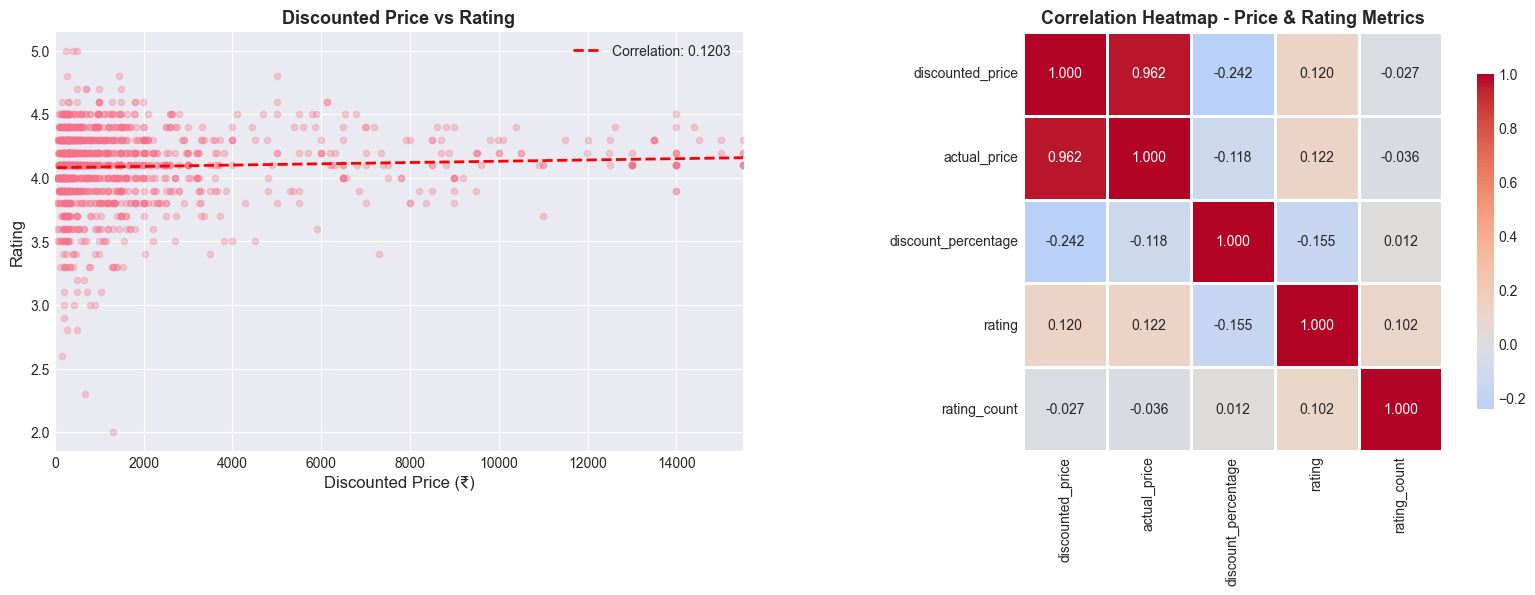


Interpretation: There is a weak positive correlation between price and rating.


In [30]:
correlation = df[['discounted_price', 'rating']].corr()
price_rating_corr = df['discounted_price'].corr(df['rating'])
print(f"Correlation between Discounted Price and Rating: {price_rating_corr:.4f}")
print("\nCorrelation Matrix:")
print(correlation)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Drop NaN from BOTH columns together
plot_data = df[['discounted_price', 'rating']].dropna()
x_data = plot_data['discounted_price']
y_data = plot_data['rating']

axes[0].scatter(x_data, y_data, alpha=0.3, s=20)
z = np.polyfit(x_data, y_data, 1)
p = np.poly1d(z)
x_sorted = x_data.sort_values()
axes[0].plot(x_sorted, p(x_sorted), "r--", linewidth=2, 
             label=f'Correlation: {price_rating_corr:.4f}')

axes[0].set_xlabel('Discounted Price (₹)', fontsize=12)
axes[0].set_ylabel('Rating', fontsize=12)
axes[0].set_title('Discounted Price vs Rating', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].set_xlim(0, df['discounted_price'].quantile(0.95))

numeric_cols = df[['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].corr()
sns.heatmap(numeric_cols, annot=True, fmt='.3f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[1])
axes[1].set_title('Correlation Heatmap - Price & Rating Metrics', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

if abs(price_rating_corr) < 0.3:
    interpretation = "weak"
elif abs(price_rating_corr) < 0.7:
    interpretation = "moderate"
else:
    interpretation = "strong"

direction = "positive" if price_rating_corr > 0 else "negative"
print(f"\nInterpretation: There is a {interpretation} {direction} correlation between price and rating.")


## 11. Question 9: Top 5 Categories Based on Highest Ratings


=== Top 5 Categories by Highest Average Rating ===
                                                    avg_rating  review_count  \
category                                                                       
Electronics|Mobiles&Accessories|MobileAccessori...        4.47             7   
Home&Kitchen|Kitchen&HomeAppliances|SmallKitche...        4.46             5   
Electronics|GeneralPurposeBatteries&BatteryChar...        4.41             7   
Computers&Accessories|ExternalDevices&DataStora...        4.40             6   
Computers&Accessories|Accessories&Peripherals|K...        4.38             8   

                                                    rating_std  \
category                                                         
Electronics|Mobiles&Accessories|MobileAccessori...        0.17   
Home&Kitchen|Kitchen&HomeAppliances|SmallKitche...        0.22   
Electronics|GeneralPurposeBatteries&BatteryChar...        0.07   
Computers&Accessories|ExternalDevices&DataStora...       

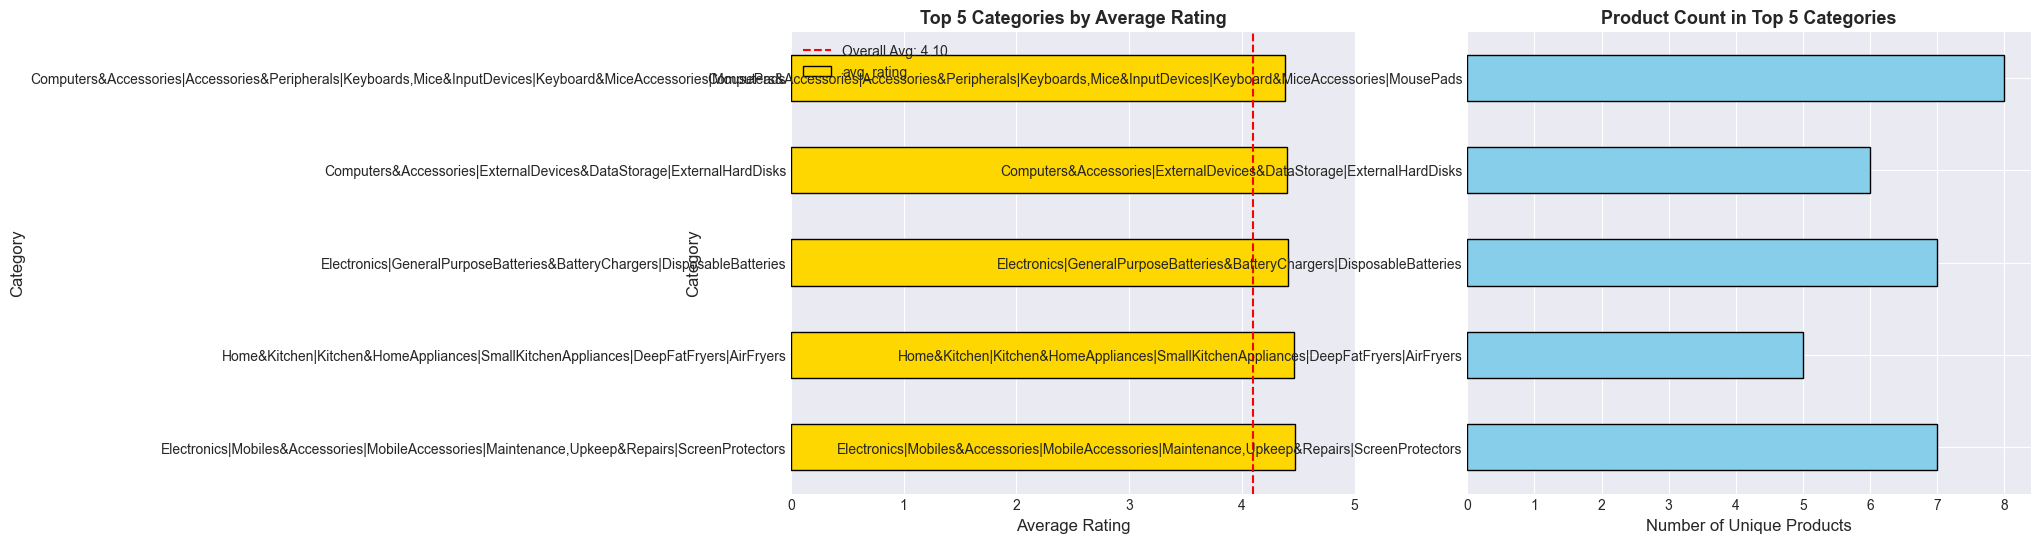

In [31]:
# Calculate average rating by category with minimum product threshold
category_stats = df.groupby('category').agg({
    'rating': ['mean', 'count', 'std'],
    'product_id': 'nunique'
}).round(2)

category_stats.columns = ['avg_rating', 'review_count', 'rating_std', 'unique_products']
category_stats = category_stats[category_stats['unique_products'] >= 5]  # At least 5 products
top_5_categories = category_stats.nlargest(5, 'avg_rating')

print("\n=== Top 5 Categories by Highest Average Rating ===")
print(top_5_categories)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
top_5_categories['avg_rating'].plot(kind='barh', ax=axes[0], color='gold', edgecolor='black')
axes[0].set_xlabel('Average Rating', fontsize=12)
axes[0].set_ylabel('Category', fontsize=12)
axes[0].set_title('Top 5 Categories by Average Rating', fontsize=13, fontweight='bold')
axes[0].set_xlim(0, 5)
axes[0].axvline(x=df['rating'].mean(), color='red', linestyle='--', 
                label=f'Overall Avg: {df["rating"].mean():.2f}')
axes[0].legend()

# Show product count for context
top_5_categories['unique_products'].plot(kind='barh', ax=axes[1], color='skyblue', edgecolor='black')
axes[1].set_xlabel('Number of Unique Products', fontsize=12)
axes[1].set_ylabel('Category', fontsize=12)
axes[1].set_title('Product Count in Top 5 Categories', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

## 12. Question 10: Areas for Improvement and Optimization

In [32]:

# 1. Low-rated categories analysis
low_rated_categories = avg_rating_by_category.tail(10)
print("\n1. LOW-RATED CATEGORIES (Need Quality Improvement):")
print(low_rated_categories)

# 2. High discount but low rating (potential quality issues)
problematic_products = df[(df['discount_percentage'] > df['discount_percentage'].quantile(0.75)) & 
                          (df['rating'] < df['rating'].quantile(0.25))]
print(f"\n2. HIGH DISCOUNT + LOW RATING PRODUCTS (Potential Quality Issues):")
print(f"   Count: {len(problematic_products)}")
print(problematic_products[['product_name', 'category', 'discount_percentage', 'rating']].head(10))

# 3. High price but low rating (overpriced products)
overpriced = df[(df['actual_price'] > df['actual_price'].quantile(0.75)) & 
                (df['rating'] < df['rating'].quantile(0.25))]
print(f"\n3. OVERPRICED PRODUCTS (High Price + Low Rating):")
print(f"   Count: {len(overpriced)}")
print(overpriced[['product_name', 'actual_price', 'rating']].head(10))

# 4. Categories with high variance in ratings (inconsistent quality)
category_variance = df.groupby('category')['rating'].std().sort_values(ascending=False).head(10)
print("\n4. CATEGORIES WITH INCONSISTENT QUALITY (High Rating Variance):")
print(category_variance)

# 5. Underperforming products (low rating count despite good ratings)
underperforming = df[(df['rating'] > df['rating'].quantile(0.75)) & 
                     (df['rating_count'] < df['rating_count'].quantile(0.25))]
print(f"\n5. UNDERPERFORMING PRODUCTS (High Quality but Low Visibility):")
print(f"   Count: {len(underperforming)} - Need marketing boost")
print(underperforming[['product_name', 'category', 'rating', 'rating_count']].head(10))

# 6. Optimal price range analysis
print("\n6. OPTIMAL PRICE RANGES BY RATING:")
df['price_range'] = pd.cut(df['discounted_price'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
price_range_ratings = df.groupby('price_range')['rating'].agg(['mean', 'count'])
print(price_range_ratings)

# 7. Discount effectiveness
print("\n7. DISCOUNT EFFECTIVENESS ANALYSIS:")
df['discount_range'] = pd.cut(df['discount_percentage'], bins=[0, 20, 40, 60, 80, 100], 
                               labels=['0-20%', '20-40%', '40-60%', '60-80%', '80-100%'])
discount_effectiveness = df.groupby('discount_range').agg({
    'rating': 'mean',
    'rating_count': 'mean',
    'product_id': 'count'
}).round(2)
discount_effectiveness.columns = ['Avg Rating', 'Avg Rating Count', 'Product Count']
print(discount_effectiveness)


1. LOW-RATED CATEGORIES (Need Quality Improvement):
category
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|VacuumSealers                                        3.67
Computers&Accessories|Printers,Inks&Accessories|Printers                                                        3.67
Home&Kitchen|Kitchen&HomeAppliances|SewingMachines&Accessories|Sewing&EmbroideryMachines                        3.65
Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|HalogenHeaters                                              3.60
Computers&Accessories|Printers,Inks&Accessories|Printers|InkjetPrinters                                         3.60
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                              3.60
Electronics|HomeTheater,TV&Video|Accessories|3DGlasses                                                          3.50
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                 3.50
Co

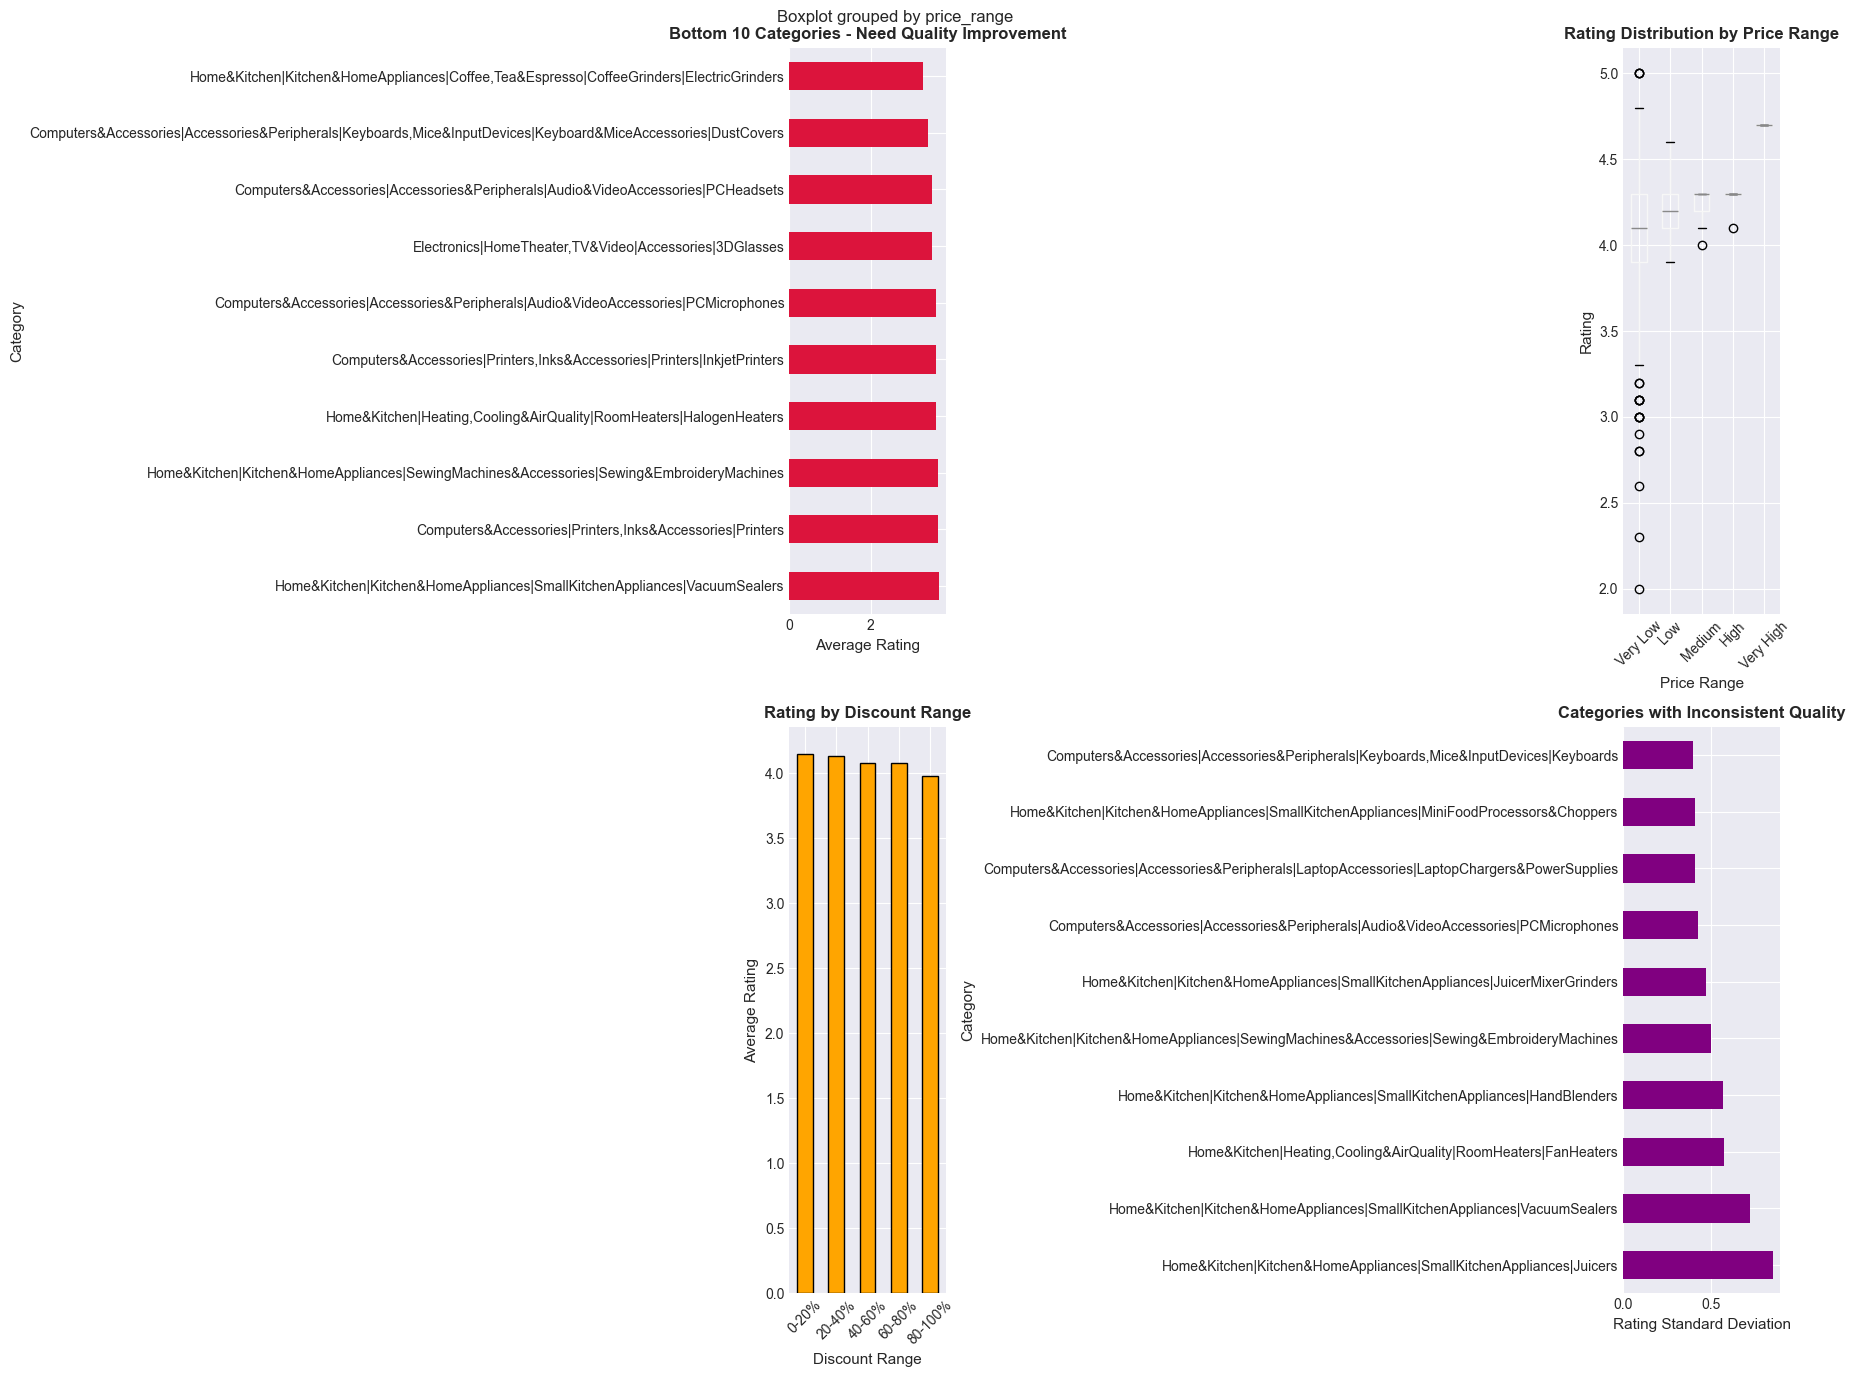

In [33]:
# Visualize improvement opportunities
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# 1. Low rated categories
low_rated_categories.plot(kind='barh', ax=axes[0, 0], color='crimson')
axes[0, 0].set_xlabel('Average Rating', fontsize=11)
axes[0, 0].set_ylabel('Category', fontsize=11)
axes[0, 0].set_title('Bottom 10 Categories - Need Quality Improvement', fontsize=12, fontweight='bold')

# 2. Rating distribution by price range
df.boxplot(column='rating', by='price_range', ax=axes[0, 1])
axes[0, 1].set_xlabel('Price Range', fontsize=11)
axes[0, 1].set_ylabel('Rating', fontsize=11)
axes[0, 1].set_title('Rating Distribution by Price Range', fontsize=12, fontweight='bold')
plt.sca(axes[0, 1])
plt.xticks(rotation=45)

# 3. Discount effectiveness
discount_effectiveness['Avg Rating'].plot(kind='bar', ax=axes[1, 0], color='orange', edgecolor='black')
axes[1, 0].set_xlabel('Discount Range', fontsize=11)
axes[1, 0].set_ylabel('Average Rating', fontsize=11)
axes[1, 0].set_title('Rating by Discount Range', fontsize=12, fontweight='bold')
axes[1, 0].tick_params(axis='x', rotation=45)

# 4. Category variance
category_variance.plot(kind='barh', ax=axes[1, 1], color='purple')
axes[1, 1].set_xlabel('Rating Standard Deviation', fontsize=11)
axes[1, 1].set_ylabel('Category', fontsize=11)
axes[1, 1].set_title('Categories with Inconsistent Quality', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()